# Policy analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
savefig = True
savetab = True

In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from matplotlib.ticker import MaxNLocator, MultipleLocator
import json
import ptitprince as pt
import pickle as pkl
# import contextily as ctx
from unbreakable.analysis.analyzer import *
import ptitprince as pt
from ema_workbench import load_results
sns.set_theme(style="ticks")

## Load results

In [4]:
country = 'Dominica'

In [8]:
# Load policy results
n_scenarios = 1000
n_policies = 7
return_period = 100
results = load_results(f'../../experiments/{country}/return_period={return_period}, scenarios={n_scenarios}, policies={n_policies}.tar.gz')

# Prepare outcomes data frame
outcomes = prepare_outcomes(results, add_uncertainties=False, add_policies=True)

# This outcome should be studied separately
outcomes.drop('years_in_poverty', axis=1, inplace=True)

In [9]:
# Split ASP and retrofit policies
asp, retrofit = split_policies(outcomes)

## Is there any impact of the policy on the outcomes?

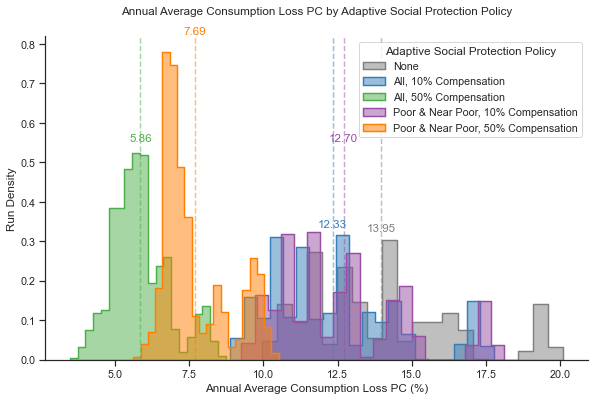

In [10]:
outcome = 'annual_avg_consum_loss_pct'
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

n_policies = asp['current_policy'].nunique()

top_up_mapper = {'0' : 'None', '10' : '10% Compensation', '30': '30%', '50': '50% Compensation', '100': '100%'}
target_group_mapper = {'all' : 'All', 'poor' : 'Poor', 'poor_near_poor2.0' : 'Poor & Near Poor'}
asp_policies = ['none', 'asp:all+10', 'asp:all+50', 'asp:poor_near_poor2.0+10', 'asp:poor_near_poor2.0+50']

# Get a colormap
cmap = sns.color_palette('Set1', n_colors=n_policies+1)

for i, policy in enumerate(asp_policies):
    df = asp[asp['current_policy'] == policy]
    if policy == 'none':
        label = 'None'
        color = 'grey'
        df = outcomes[outcomes['current_policy'] == 'none']
    else:
        label = target_group_mapper[df['target_group'].iloc[0]] + ', ' + top_up_mapper[df['top_up'].iloc[0]]
        color = cmap[i]

    sns.histplot(df[outcome], ax=ax, label=label, alpha=0.5, color=color, stat='density', common_norm=False,
                 element='step', bins=20, linewidth=1.5, line_kws={'alpha': 0.5})
    
    # Add lines for the mean as vertical lines
    mean = df[outcome].mean()
    ax.axvline(mean, color=color, linestyle='--', alpha=0.5)
    y_min, y_max = ax.get_ylim()
    ax.text(mean, y_max, f'{mean:.2f}', rotation=0, verticalalignment='bottom', horizontalalignment='center', color=color)

ax.legend(title='Adaptive Social Protection Policy')
sns.despine()
plt.xlabel('Annual Average Consumption Loss PC (%)')
plt.ylabel('Run Density')
plt.title('Annual Average Consumption Loss PC by Adaptive Social Protection Policy', y=1.05)
plt.savefig('asp.png', dpi=300, bbox_inches='tight')

In [12]:
retrofit

,scenario,policy,region,random_seed,current_policy,tot_pop,n_aff_people,n_retrofitted_ppl,n_retrofitted_hh,n_aff_retrofitted_ppl,...,new_poverty_gap_initial,new_poverty_gap_all,annual_avg_consum_loss,annual_avg_consum_loss_pct,r,n_poor_ratio,n_new_poor_increase_pp,target_group,houses_pct,top_up
2000,7,2,St. George,78805658,retrofit:all+100,90278.688,51560.992803,16978.563,530,9247.078025,...,25.248063,21.414262,275.422345,10.705428,3.153199,15.0,5.946032,all,100,NaN
2001,8,2,St. George,350926753,retrofit:all+100,90278.688,55063.716991,16978.563,551,10256.271398,...,24.404277,20.426999,269.836354,11.007125,2.926067,15.0,8.653205,all,100,NaN
2002,9,2,St. George,335649833,retrofit:all+100,90278.688,53863.099070,16978.563,552,11024.703066,...,25.085064,19.551525,268.963727,10.816803,2.985423,15.0,9.626857,all,100,NaN
2003,10,2,St. George,422460329,retrofit:all+100,90278.688,52473.757849,16978.563,547,10221.428232,...,24.855359,20.206491,271.809538,10.841745,3.100484,15.0,8.419484,all,100,NaN
2004,11,2,St. George,854157522,retrofit:all+100,90278.688,51924.935109,16978.563,590,9417.561689,...,24.932213,20.449842,277.366390,11.059583,3.059947,15.0,8.067242,all,100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68995,1002,5,St. Andrew,531910694,none,46678.500,27321.070680,0.000,0,0.000000,...,47.610226,43.719367,120.262708,16.233648,0.538461,49.0,5.413627,none,NaN,none
68996,1003,5,St. Andrew,499744849,none,46678.500,29422.209894,0.000,0,0.000000,...,48.679603,44.347614,116.324916,16.777892,0.488566,49.0,6.654027,none,NaN,none
68997,1004,5,St. Andrew,289645522,none,46678.500,28295.175126,0.000,0,0.000000,...,48.198884,44.045645,118.006402,16.440279,0.502503,49.0,5.730690,none,NaN,none
68998,1005,5,St. Andrew,781514864,none,46678.500,27453.178298,0.000,0,0.000000,...,48.100587,43.471980,115.264286,16.512197,0.507699,49.0,6.576904,none,NaN,none


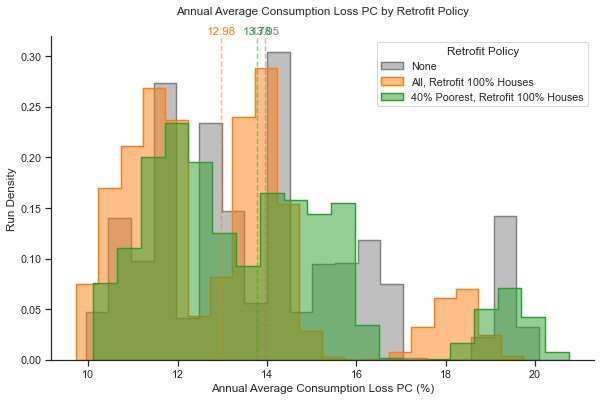

In [22]:
outcome = 'annual_avg_consum_loss_pct'
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

n_policies = retrofit['current_policy'].nunique() + 1

pct_house_mapper = {'100': 'Retrofit 100% Houses'}
target_group_mapper = {'all' : 'All', 'poor_40' : '40% Poorest'}
retrofit_policies = ['asp:all+0', 'retrofit:all+100', 'retrofit:poor_40+100']

cmap = sns.color_palette('tab10', n_colors=n_policies)

for i, policy in enumerate(retrofit_policies):
    
    if policy == 'asp:all+0':
        label = 'None'
        color = 'grey'
        df = outcomes[outcomes['current_policy'] == 'none']
    else:
        df = retrofit[retrofit['current_policy'] == policy]
        color = cmap[i]
        label = target_group_mapper[df['target_group'].iloc[0]] + ', ' + pct_house_mapper[df['houses_pct'].iloc[0]]
    
    sns.histplot(df[outcome], ax=ax, label=label, alpha=0.5, color=color, stat='density', common_norm=False,
                 element='step', bins=20, linewidth=1.5, line_kws={'alpha': 0.5}
                 )
    
    # Add lines for the mean as vertical lines
    mean = df[outcome].mean()
    ax.axvline(mean, color=color, linestyle='--', alpha=0.5)
    y_min, y_max = ax.get_ylim()
    ax.text(mean, y_max, f'{mean:.2f}', rotation=0, verticalalignment='bottom', horizontalalignment='center', color=color)

ax.legend(title='Retrofit Policy')
sns.despine()
plt.xlabel('Annual Average Consumption Loss PC (%)')
plt.ylabel('Run Density');
plt.title('Annual Average Consumption Loss PC by Retrofit Policy', y=1.05)
plt.savefig('retrofit.png', dpi=300, bbox_inches='tight')

In [12]:
df = retrofit.groupby(['region', 'current_policy']).mean(numeric_only=True)['annual_avg_consum_loss_pct']
df = df.unstack().copy()

# Calculate the difference between the policies in % decrease from none
df['retrofit:all+100 effect'] = df['none'] - df['retrofit:all+100']
df['retrofit:poor_40+100 effect'] = df['none'] - df['retrofit:poor_40+100']
df['retrofit:all+100 pct effect'] = (df['none'] - df['retrofit:all+100']) / df['none'] * 100
df['retrofit:poor_40+100 pct effect'] = (df['none'] - df['retrofit:poor_40+100']) / df['none'] * 100

In [13]:
df

current_policy,none,retrofit:all+100,retrofit:poor_40+100,retrofit:all+100 effect,retrofit:poor_40+100 effect,retrofit:all+100 pct effect,retrofit:poor_40+100 pct effect
region,,,,,,,
St. Andrew,16.470005,14.187754,15.695810,2.282251,0.774195,13.857017,4.700638
St. David,12.983983,11.596274,12.517388,1.387709,0.466594,10.687854,3.593615
St. George,11.576694,10.860206,11.634295,0.716488,-0.057601,6.189055,-0.497562
St. John,15.497752,13.689262,15.030048,1.808489,0.467704,11.669367,3.017885
St. Joseph,19.359041,18.171097,19.341700,1.187945,0.017341,6.136382,0.089578
St. Luke,14.156133,13.924336,14.259246,0.231797,-0.103113,1.637435,-0.728395
St. Mark,10.597664,10.297606,10.699388,0.300058,-0.101724,2.831361,-0.959867
St. Patrick,14.349343,13.590462,14.121489,0.758882,0.227854,5.288617,1.587907
St. Paul,12.861507,11.948208,12.698996,0.913299,0.162512,7.101025,1.263551


## What is the impact of top-ups across target groups and districts?

In [ ]:
df = asp.copy()
columns_of_interest = [
       'target_group',
       'top_up', 
       'n_new_poor',
       'annual_average_consumption_loss_pct',
       'r']
tab = df[columns_of_interest].round(2).groupby(['target_group', 'top_up']).mean(numeric_only=True).round(2)

# Remove first row of the table since its empty
tab = tab.iloc[1:]
tab

n_new_poor  annual_average_consumption_loss_pct  \
target_group      top_up                                                    
poor_near_poor2.0 10            7.44                                15.94   
                  50            4.41                                11.38   
all               0             9.13                                17.08   
                  10            7.44                                15.33   
                  50            4.41                                 8.30   

                             r  
target_group      top_up        
poor_near_poor2.0 10      3.09  
                  50      4.51  
all               0       2.86  
                  10      3.25  
                  50      6.41

In [ ]:
# Remove first row of the table since its empty
tab = tab.iloc[1:]

In [ ]:
# top_up_mapper = {'0' : 'None', '10' : '10\%', '30': '30\%', '50': '50\%', '100': '100\%'}
top_up_mapper = {'0' : 'None', '10' : '10%', '30': '30%', '50': '50%', '100': '100%'}
target_group_mapper = {'all' : 'All', 'poor' : 'Poor', 'poor_near_poor1.25' : 'Poor and Near Poor (1.25)', 'poor_near_poor2.0' : 'Poor and Near Poor (2.0)'}
# outcome_name_mapper = {'annual_average_consumption_loss_pct' : 'Annual average consumption loss (\%)', 'n_new_poor' : 'Number of new poor'}
outcome_name_mapper = {'annual_average_consumption_loss_pct' : 'Annual average consumption loss (%)', 'n_new_poor' : 'Number of new poor'}

tab.rename(index = top_up_mapper, inplace = True)
tab.rename(index = target_group_mapper, inplace = True)
tab.rename(columns = outcome_name_mapper, inplace = True)
tab.index.names = ['Target group', 'Top-up percentage']

tab['Number of new poor'] = tab['Number of new poor'].astype(int)

C:\Users\Mikhail\AppData\Local\Temp\ipykernel_15560\3895462403.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab.rename(index = top_up_mapper, inplace = True)
C:\Users\Mikhail\AppData\Local\Temp\ipykernel_15560\3895462403.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab.rename(index = target_group_mapper, inplace = True)
C:\Users\Mikhail\AppData\Local\Temp\ipykernel_15560\3895462403.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [ ]:
tab

Number of new poor  \
Target group             Top-up percentage                       
Poor and Near Poor (2.0) 50%                                 4   
All                      None                                9   
                         10%                                 7   
                         50%                                 4   

                                            Annual average consumption loss (%)  \
Target group             Top-up percentage                                        
Poor and Near Poor (2.0) 50%                                              11.38   
All                      None                                             17.08   
                         10%                                              15.33   
                         50%                                               8.30   

                                               r  
Target group             Top-up percentage        
Poor and Near Poor (2.0) 50%                4.51  
All                      None               2.86  
                         10%                3.25  
                         50%                6.41

In [ ]:
# TODO: Rewrite this part to be more general
n_target_groups = asp['target_group'].nunique()
print('Number of target groups:', n_target_groups)
# n_target_groups = 1
k = 0
m_top_ups = asp['top_up'].nunique()
print('Number of top-ups:', m_top_ups)
# m_top_ups = 2
for i in range(n_target_groups):
    x = tab.iloc[k, 0]
    y = tab.iloc[k, 1]
    tab.iloc[k, 0] = 0
    tab.iloc[k, 1] = 0
    for j in range(k + 1, k + m_top_ups + 1):
        tab.iloc[j, 0] = x - tab.iloc[j, 0]
        tab.iloc[j, 1] = y - tab.iloc[j, 1]
    k += m_top_ups + 1

# tab.columns = ['Average number of people preventing from falling into poverty',
#                # 'Average reduction in consumption loss (\%)'
#                'Average reduction in consumption loss (p.p.)'
#                ]
# tab = tab + 0
# tab

Number of target groups: 2
Number of top-ups: 3


IndexError: index 4 is out of bounds for axis 0 with size 4

In [ ]:
tab.style.background_gradient(cmap='Blues', subset='Average number of people preventing from falling into poverty')\
         .background_gradient(cmap='Greens', subset='Average reduction in consumption loss (p.p.)')\
         .format(decimal='.', thousands=',', precision=2)\
         .set_table_styles([dict(selector='th', props=[('max-width', '80px')])])\
            .set_properties(**{'text-align': 'center'})\
            .set_properties(**{'width': '160px'})\
            .set_properties(**{'height': '30px'})\
            .set_properties(**{'font-size': '12pt'})\
            .set_properties(**{'border-style': 'solid'})\
            .set_properties(**{'border-width': '1px'})\
            .set_properties(**{'border-color': 'black'})\
            .set_properties(**{'border-collapse': 'collapse'})\
            .set_properties(**{'border-spacing': '0px'})\
            .set_properties(**{'border': '1px'})\
            .set_properties(**{'border-style': 'solid'})
        #  .format(decimal='.', thousands=',', precision=2)\
        #  .to_latex(buf='../reports/tables/policy_analysis_country.tex',
        #            caption='Impact of cash transfers across different target groups on the country scale.',
        #            position='H',
        #            convert_css=True,
        #            hrules=True,
        #            label='tab:policy_analysis_country',
        #            sparse_index=True,
        #            sparse_columns=True,
        #            column_format='p{4cm}p{4cm}p{3cm}p{3cm}p{3cm}',
        #            multicol_align="|c|",
        #            position_float="centering",
        #           )

In [ ]:
target_group = 'all'
top_ups = ['50'] # , '100']
df = outcomes[outcomes['target_group'] == target_group].copy()
df = df[df['top_up'].isin(top_ups)]

In [ ]:
df['annual_average_consumption_loss_pct'].mean()

4.398683718805956

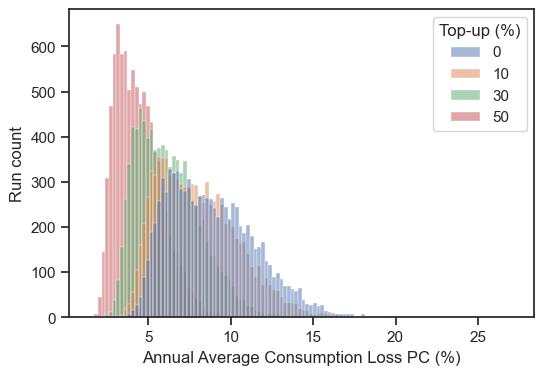

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

if savefig:
    pct_symbol = '\%'
    pct_symbol = '%'
else:
    pct_symbol = '%'

target_group = 'all'
top_ups = ['0', '10', '30', '50'] # , '100']
df = outcomes[outcomes['target_group'] == target_group].copy()
df = df[df['top_up'].isin(top_ups)]
df['top_up'] = df['top_up'].astype(str)
df['top_up'] = pd.Categorical(df['top_up'], categories=top_ups, ordered=True)
df.rename(columns={'top_up': f'Top-up ({pct_symbol})'}, inplace=True)
outcome_of_interest = 'annual_average_consumption_loss_pct'
sns.histplot(data=df, x=outcome_of_interest, hue=f'Top-up ({pct_symbol})', ax=ax)
plt.xlabel(f'Wt. Ann. Avg. Consump. Loss p.c. ({pct_symbol})')
plt.xlabel('Annual Average Consumption Loss PC (%)')
plt.ylabel('Run count')
if savefig:
    plt.savefig('../reports/figures/policy_analysis/top_up_all.pgf', bbox_inches='tight')
    plt.savefig('../reports/figures/policy_analysis/top_up_all.png', bbox_inches='tight', dpi=300);

else:
    plt.title('Top-up all affected households');

In [ ]:
tab = df.copy()
outcome_of_interest = 'Wt. Ann. Avg. Consump. Loss p.c. (\%)'
tab.rename({'annual_average_consumption_loss_pct':
            'Wt. Ann. Avg. Consump. Loss p.c. (\%)'}, inplace=True, axis=1)
tab = tab.groupby('Top-up (\%)').describe()[[outcome_of_interest]]
tab.drop('count', axis=1, level=1, inplace=True)
tab = tab.rename({'25%': '25\%', '50%': '50\%', '75%': '75\%'}, axis=1, level=1)
tab = tab.T
style = tab.style.format(decimal='.', thousands=',', precision=2)
if savetab:
    style.to_latex(buf='../reports/tables/top_up_all_country.tex',
                caption='Impact of cash transfers to "All" target group on the country scale.',
                position='H',
                hrules=True,
                label='tab:top_up_all_country',
                sparse_index=True,
                sparse_columns=True,
                # column_format='p{4cm}p{4cm}p{3cm}p{3cm}p{3cm}'
                )
else:
    pass

## How the top-up to `all` mitigates the impact of a flood?

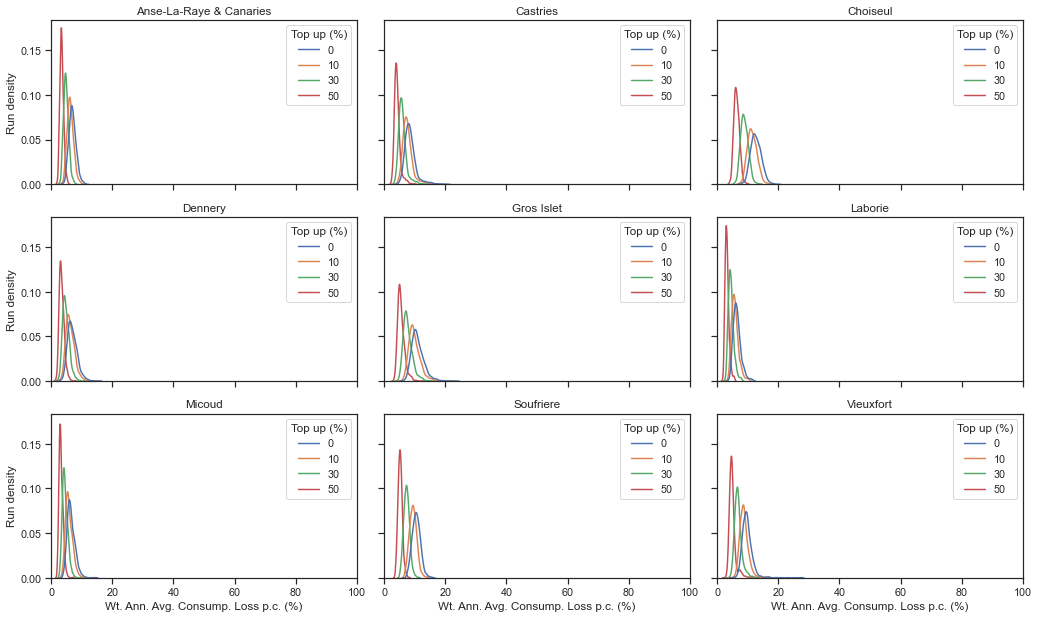

In [ ]:
target_group = 'all'
top_ups = ['0', '10', '30', '50']
df = outcomes[outcomes['target_group'] == target_group]
df = df[df['top_up'].isin(top_ups)]
df['top_up'] = pd.Categorical(df['top_up'], categories=top_ups, ordered=True)

districts = df['district'].unique().tolist()
n_districts = len(districts)

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(5 * n_districts / 3, 3 * n_districts / 3), sharex=True, sharey=True)
colors = sns.color_palette('Set2', n_colors=len(districts))

# outcome_of_interest = 'n_new_poor'

outcome_name_mapper = {'annual_average_consumption_loss_pct': 'Wt. Ann. Avg. Consump. Loss p.c. (%)',
                       'n_new_poor': 'Number of new poor',
                       'n_new_poor_increase_pct' : 'Increase in number of new poor (%)'}

outcome_of_interest = 'annual_average_consumption_loss_pct'

for district in districts:
    data = df[df['district'] == district][['top_up', outcome_of_interest]]
    data.sort_values('top_up', inplace=True)
    data.rename(columns={'top_up': 'Top up (%)'}, inplace=True)
    if district == 'AnseLaRayeCanaries':
        district_name = 'Anse-La-Raye & Canaries'
    else:
        district_name = district
    i = districts.index(district) // 3
    j = districts.index(district) % 3
    color = colors[districts.index(district)]
    # sns.histplot(data=data, 
    #              x=outcome_of_interest, 
    #              hue='Top up', 
    #              ax=ax[i, j], 
    #              # multiple='stack', 
    #              # shrink=.8,
    #              # palette="ch:rot=-.25,hue=1,light=.75"
    #              )
    sns.kdeplot(data=data, 
                 x=outcome_of_interest, 
                 hue='Top up (%)', 
                 ax=ax[i, j], 
                 )
    ax[i, j].set_title(district_name)
    ax[i, j].set_ylabel('Run density')
    ax[i, j].set_xlabel(outcome_name_mapper[outcome_of_interest])
    ax[i, j].set_xlim(0, 100)
# fig.suptitle('Target group: ' + target_group_mapper[target_group], fontsize=16)
fig.tight_layout()
plt.savefig('../reports/figures/policy_analysis/top_up_all_country.png', dpi=300, bbox_inches='tight')

In [ ]:
# Select target group
df = outcomes[outcomes['target_group'] == 'all']

# Select districts with low, mid and high consumption annual_average_consumption_loss_pct
districts_of_interest = ['Micoud', 'Laborie', 'Choiseul']
df = df[df['district'].isin(districts_of_interest)]

# Select top-ups of 0, 50 and 100
df = df[df['top_up'].isin(['0', '10', '30', '50'])]
df['top_up'] = df['top_up'].astype('str')
df['top_up'] = pd.Categorical(df['top_up'], ['0', '10', '30', '50'])
df.rename(columns={'top_up': 'Top-up (%)', 'district' : 'District', 'annual_average_consumption_loss_pct': 'Annual average consumption loss (%)'}, inplace=True)
df.sort_values(by='District', inplace=True)

## Which policies are the most effective?

### Consumption loss

In [ ]:
df = get_policy_effectiveness_tab(outcomes)

In [ ]:
# How effective is the policy in reducing income loss?
df.groupby(['Policy']).mean(numeric_only=True)['Annual average consumption loss (%)'].sort_values(ascending=True).round(2)

Policy
100% to all                          0.00
100% to poor and near poor (2.0)     3.30
50% to all                           4.40
100% to poor and near poor (1.25)    5.81
50% to poor and near poor (2.0)      6.05
30% to all                           6.19
100% to poor                         6.81
30% to poor and near poor (2.0)      7.17
50% to poor and near poor (1.25)     7.31
50% to poor                          7.81
30% to poor and near poor (1.25)     7.92
10% to all                           7.96
30% to poor                          8.22
10% to poor and near poor (2.0)      8.28
10% to poor and near poor (1.25)     8.53
10% to poor                          8.63
None                                 8.83
Name: Annual average consumption loss (%), dtype: float64

In [ ]:
# What about the effectiveness by district?
df = df.groupby(['District', 'Policy']).mean(numeric_only=True)[['Annual average consumption loss (%)']] 
df = df.sort_values(by=['District', 'Annual average consumption loss (%)'])

In [ ]:
top_3_policies = {}
for district in outcomes['district'].unique():
    top_3_policies[district] = df.loc[district, :].iloc[:3].index.tolist()
top_3_policies = pd.DataFrame(top_3_policies).T
top_3_policies.columns = [1, 2, 3]

bottom_3_policies = {}
for district in outcomes['district'].unique():
    bottom_3_policies[district] = df.loc[district, :].iloc[-4:-1].index.tolist()
bottom_3_policies = pd.DataFrame(bottom_3_policies).T
bottom_3_policies.columns = [1, 2, 3]

In [ ]:
top_3_policies

,1,2,3
Anse-La-Raye & Canaries,100% to all,100% to poor and near poor (2.0),100% to poor and near poor (1.25)
Castries,100% to all,100% to poor and near poor (2.0),50% to all
Choiseul,100% to all,100% to poor and near poor (2.0),50% to all
Dennery,100% to all,100% to poor and near poor (2.0),50% to all
Gros Islet,100% to all,50% to all,100% to poor and near poor (2.0)
Laborie,100% to all,100% to poor and near poor (2.0),50% to all
Micoud,100% to all,100% to poor and near poor (2.0),50% to all
Soufriere,100% to all,100% to poor and near poor (2.0),50% to all
Vieuxfort,100% to all,100% to poor and near poor (2.0),50% to all


In [ ]:
bottom_3_policies

,1,2,3
Anse-La-Raye & Canaries,10% to poor and near poor (2.0),10% to poor and near poor (1.25),10% to poor
Castries,10% to poor and near poor (2.0),10% to poor and near poor (1.25),10% to poor
Choiseul,30% to poor,10% to poor and near poor (1.25),10% to poor
Dennery,10% to poor and near poor (2.0),10% to poor and near poor (1.25),10% to poor
Gros Islet,30% to poor,10% to poor and near poor (1.25),10% to poor
Laborie,30% to poor,10% to poor and near poor (1.25),10% to poor
Micoud,10% to poor and near poor (2.0),10% to poor and near poor (1.25),10% to poor
Soufriere,30% to poor,10% to poor and near poor (1.25),10% to poor
Vieuxfort,10% to poor and near poor (2.0),10% to poor and near poor (1.25),10% to poor


### Number of poor

In [ ]:
df = get_policy_effectiveness_tab(outcomes)

In [ ]:
# How effective is the policy in reducing income loss?
df.groupby(['Policy']).mean(numeric_only=True)['Number of new poor'].sort_values(ascending=True).round(2)

Policy
100% to all                           0.00
100% to poor and near poor (2.0)      0.67
100% to poor and near poor (1.25)     7.69
50% to all                           19.45
50% to poor and near poor (2.0)      20.11
50% to poor and near poor (1.25)     26.92
30% to all                           28.05
30% to poor and near poor (2.0)      28.40
30% to poor and near poor (1.25)     32.97
10% to all                           52.26
10% to poor and near poor (2.0)      52.26
10% to poor and near poor (1.25)     54.13
None                                 59.39
30% to poor                          59.39
10% to poor                          59.39
50% to poor                          59.39
100% to poor                         59.39
Name: Number of new poor, dtype: float64

In [ ]:
# How effective is the policy in reducing number of new poor
df = df.groupby(['District', 'Policy']).mean(numeric_only=True)[['Number of new poor']] 
df = df.sort_values(by=['District', 'Number of new poor'])

In [ ]:
df

Number of new poor
District                Policy                                               
Anse-La-Raye & Canaries 100% to all                                     0.000
                        100% to poor and near poor (2.0)                0.000
                        100% to poor and near poor (1.25)               1.847
                        50% to all                                      4.364
                        50% to poor and near poor (2.0)                 4.364
...                                                                       ...
Vieuxfort               None                                          125.410
                        10% to poor                                   125.410
                        30% to poor                                   125.410
                        50% to poor                                   125.410
                        100% to poor                                  125.410

[153 rows x 1 columns]

In [ ]:
top_3_policies = {}
for district in outcomes['district'].unique():
    top_3_policies[district] = df.loc[district, :].iloc[:3].index.tolist()
top_3_policies = pd.DataFrame(top_3_policies).T
top_3_policies.columns = [1, 2, 3]

bottom_3_policies = {}
for district in outcomes['district'].unique():
    bottom_3_policies[district] = df.loc[district, :].iloc[-4:-1].index.tolist()
bottom_3_policies = pd.DataFrame(bottom_3_policies).T
bottom_3_policies.columns = [1, 2, 3]

In [ ]:
top_3_policies

,1,2,3
Anse-La-Raye & Canaries,100% to all,100% to poor and near poor (2.0),100% to poor and near poor (1.25)
Castries,100% to all,100% to poor and near poor (1.25),100% to poor and near poor (2.0)
Choiseul,100% to all,100% to poor and near poor (2.0),100% to poor and near poor (1.25)
Dennery,100% to all,100% to poor and near poor (2.0),100% to poor and near poor (1.25)
Gros Islet,100% to all,100% to poor and near poor (2.0),50% to all
Laborie,100% to all,100% to poor and near poor (1.25),100% to poor and near poor (2.0)
Micoud,50% to all,100% to all,50% to poor and near poor (2.0)
Soufriere,100% to all,100% to poor and near poor (2.0),100% to poor and near poor (1.25)
Vieuxfort,100% to all,50% to all,30% to all


In [ ]:
bottom_3_policies

,1,2,3
Anse-La-Raye & Canaries,30% to poor,50% to poor,100% to poor
Castries,10% to poor,30% to poor,50% to poor
Choiseul,10% to poor,30% to poor,50% to poor
Dennery,100% to poor,10% to poor and near poor (1.25),30% to poor and near poor (1.25)
Gros Islet,10% to poor,30% to poor,50% to poor
Laborie,50% to poor,100% to poor,10% to poor and near poor (1.25)
Micoud,10% to poor,30% to poor,50% to poor
Soufriere,10% to poor,30% to poor,50% to poor
Vieuxfort,10% to poor,30% to poor,50% to poor
